In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import spacy
import os
import numpy as np


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/venkateshmurugadas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venkateshmurugadas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data_folder = "data/COLIEE2021statute_data-English/train"

# loop through all the files in the folder and read the XML into a dataframe 

files = [pd.read_xml(os.path.join(data_folder, file)) for file in os.listdir(data_folder) if file.endswith(".xml")]
data = pd.concat(files, ignore_index=True)
data.rename(columns={'t1': 'premise', 't2': 'hypothesis'}, inplace=True)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.to_csv('data/coliee_train/coliee_2021.csv', index=False)

In [4]:
data.shape

(805, 4)

# Analysis 1: Distribution of the labels in the dataset

Total number of data points: 805
Number of data points per label:
label
Y    408
N    397
Name: count, dtype: int64


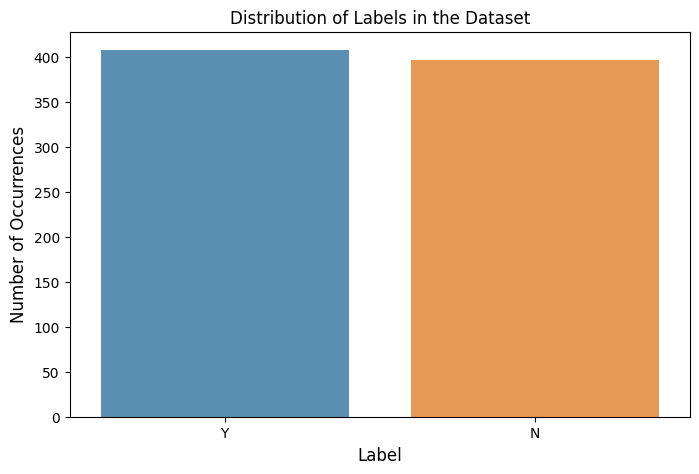

In [5]:

# Count of each label
label_counts = data['label'].value_counts()

# print
print("Total number of data points: %d" % len(data))
print("Number of data points per label:")
print(label_counts)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8)
plt.title('Distribution of Labels in the Dataset')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()


# Analysis 2: Average, minimum, and maximum length of the premises and hypotheses

In [6]:
# Calculate word counts
data['premise_word_count'] = data['premise'].apply(lambda x: len(str(x).split(" ")))
data['hypothesis_word_count'] = data['hypothesis'].apply(lambda x: len(str(x).split(" ")))

# Calculate statistics
premise_word_count_stats = data['premise_word_count'].describe()
hypothesis_word_count_stats = data['hypothesis_word_count'].describe()

premise_word_count_stats, hypothesis_word_count_stats


(count    805.000000
 mean     104.004969
 std       87.766609
 min        9.000000
 25%       48.000000
 50%       80.000000
 75%      127.000000
 max      730.000000
 Name: premise_word_count, dtype: float64,
 count    805.000000
 mean      39.436025
 std       19.349044
 min        6.000000
 25%       26.000000
 50%       37.000000
 75%       49.000000
 max      149.000000
 Name: hypothesis_word_count, dtype: float64)

# Analysis 3: Correlation between the length of the premise and the hypothesis

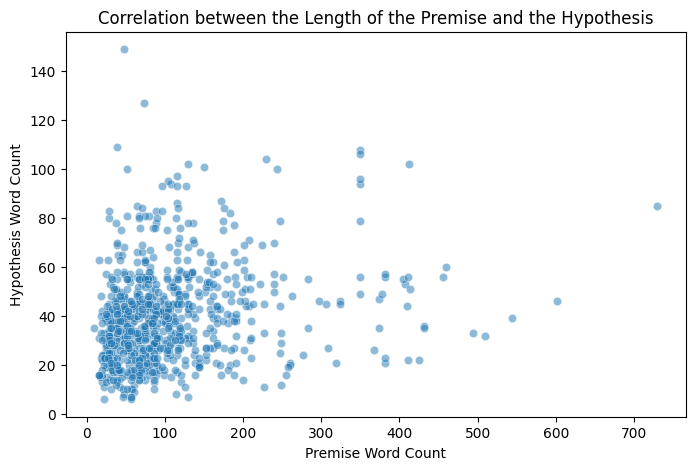

In [7]:
# Plotting
plt.figure(figsize=(8, 5))
sns.scatterplot(x='premise_word_count', y='hypothesis_word_count', data=data, alpha=0.5)
plt.title('Correlation between the Length of the Premise and the Hypothesis')
plt.xlabel('Premise Word Count')
plt.ylabel('Hypothesis Word Count')
plt.show()


# Analysis 4: Correlation between the length of the premise (or hypothesis) and the label

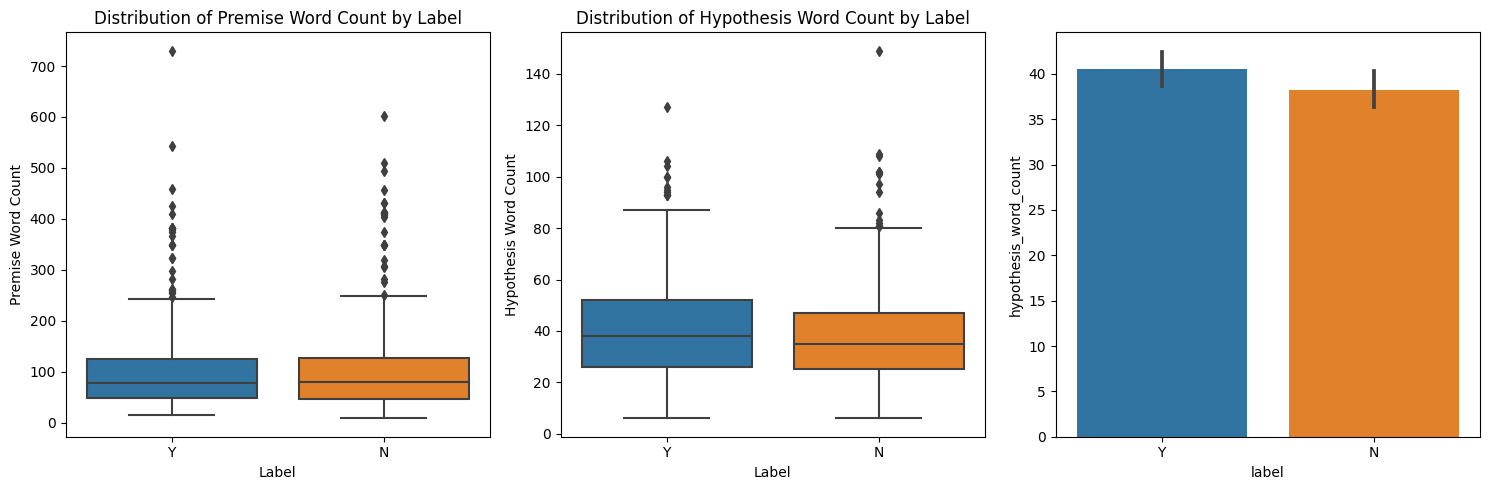

In [13]:
# Plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Premise
sns.boxplot(x='label', y='premise_word_count', data=data, ax=ax[0])
ax[0].set_title('Distribution of Premise Word Count by Label')
ax[0].set_xlabel('Label')
ax[0].set_ylabel('Premise Word Count')

# Hypothesis
sns.boxplot(x='label', y='hypothesis_word_count', data=data, ax=ax[1])
sns.barplot(x='label', y='hypothesis_word_count', data=data, ax=ax[2])
ax[1].set_title('Distribution of Hypothesis Word Count by Label')
ax[1].set_xlabel('Label')
ax[1].set_ylabel('Hypothesis Word Count')

plt.tight_layout()
plt.show()


# Analysis 5: Most common words in the premises and hypotheses for each label

In [14]:
# Function to preprocess and tokenize text
def tokenize(text):
    # Check if text is a string
    if not isinstance(text, str):
        text = ''
    # Tokenize
    tokens = word_tokenize(text)
    
    # Lowercase and remove non-alphabetic characters
    tokens = [token.lower() for token in tokens if token.isalpha()]
    
    # Remove stopwords
    # stop_words = set(stopwords.words('english'))
    # tokens = [token for token in tokens if token not in stop_words]
    
    return tokens

# Function to get most common words
def get_most_common_words(texts, n=20):
    words = []
    for text in texts:
        words.extend(tokenize(text))
    return Counter(words).most_common(n)

# Most common words for each label in the premise
most_common_words_premise = data.groupby('label')['premise'].apply(get_most_common_words).reset_index()
most_common_words_premise.columns = ['label', 'most_common_words_in_premise']

# Most common words for each label in the hypothesis
most_common_words_hypothesis = data.groupby('label')['hypothesis'].apply(get_most_common_words).reset_index()
most_common_words_hypothesis.columns = ['label', 'most_common_words_in_hypothesis']

most_common_words_premise, most_common_words_hypothesis


(  label                       most_common_words_in_premise
 0     N  [(article, 677), (person, 511), (may, 409), (p...
 1     Y  [(article, 710), (person, 492), (may, 452), (o...,
   label                    most_common_words_in_hypothesis
 0     N  [(may, 175), (b, 145), (contract, 142), (shall...
 1     Y  [(may, 196), (b, 178), (person, 165), (shall, ...)

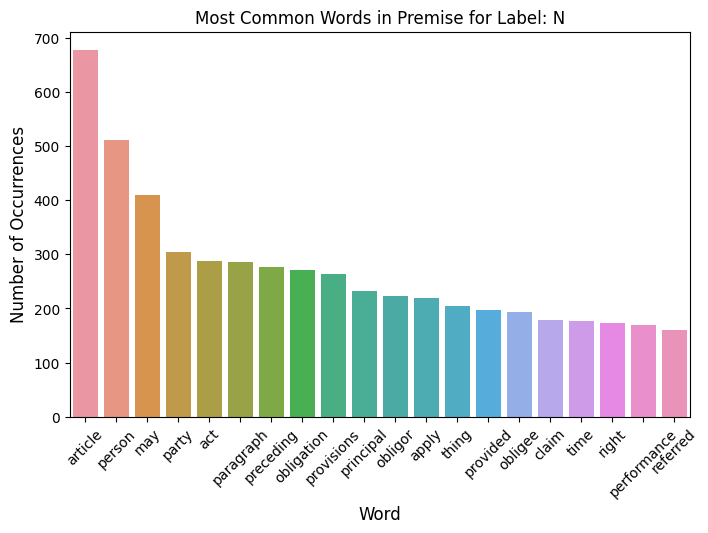

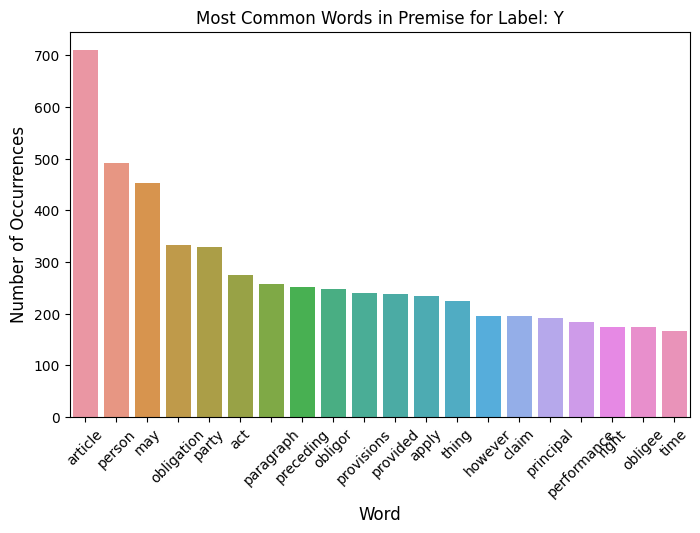

In [15]:
# plot most common words for each label in the premise
for label in most_common_words_premise['label'].unique():
    word_counts_list = most_common_words_premise[most_common_words_premise['label'] == label]['most_common_words_in_premise'].to_list()[0]
    words = [word for word, count in word_counts_list]
    counts = [count for word, count in word_counts_list]
    plt.figure(figsize=(8, 5))
    sns.barplot(x=words, y=counts)
    plt.title(f'Most Common Words in Premise for Label: {label}')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Word', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

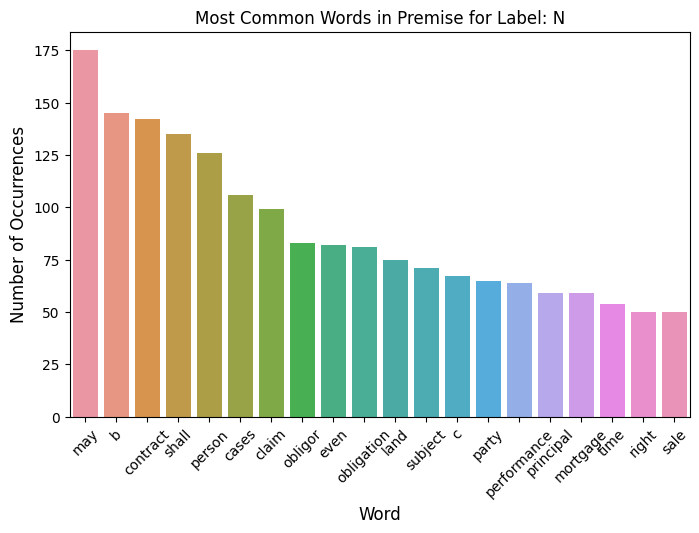

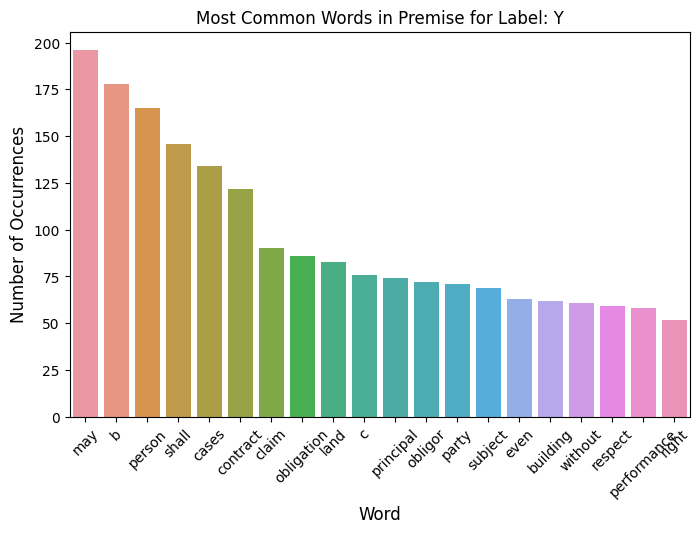

In [16]:
# plot most common words for each label in the hypothesis
for label in most_common_words_hypothesis['label'].unique():
    word_counts_list = most_common_words_hypothesis[most_common_words_hypothesis['label'] == label]['most_common_words_in_hypothesis'].to_list()[0]
    words = [word for word, count in word_counts_list]
    counts = [count for word, count in word_counts_list]
    plt.figure(figsize=(8, 5))
    sns.barplot(x=words, y=counts)
    plt.title(f'Most Common Words in Premise for Label: {label}')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Word', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

## Analysis 6: Common bigrams or trigrams in the premises and hypotheses for each label

In [17]:
from nltk import bigrams, trigrams

def get_most_common_ngrams(texts, n=10, ngram=2):
    # If ngram is 2, use bigrams
    if ngram == 2:
        ngram_function = bigrams
    # If ngram is 3, use trigrams
    elif ngram == 3:
        ngram_function = trigrams
    
    ngram_list = []
    for text in texts:
        tokens = tokenize(text)  # Use the tokenize function defined earlier
        ngram_list.extend(ngram_function(tokens))
    return Counter(ngram_list).most_common(n)

# Most common bigrams for each label in the premise
most_common_bigrams_premise = data.groupby('label')['premise'].apply(lambda x: get_most_common_ngrams(x, ngram=2)).reset_index()
most_common_bigrams_premise.columns = ['label', 'most_common_bigrams_in_premise']

# Most common trigrams for each label in the hypothesis
most_common_trigrams_hypothesis = data.groupby('label')['hypothesis'].apply(lambda x: get_most_common_ngrams(x, ngram=3)).reset_index()
most_common_trigrams_hypothesis.columns = ['label', 'most_common_trigrams_in_hypothesis']

print(most_common_bigrams_premise)
print(most_common_trigrams_hypothesis)


  label                     most_common_bigrams_in_premise
0     N  [((provided, however), 160), ((preceding, para...
1     Y  [((provided, however), 196), ((preceding, para...
  label                 most_common_trigrams_in_hypothesis
0     N  [((delivery, subject, matter), 9), ((subject, ...
1     Y  [((party, ordering, work), 17), ((holder, righ...


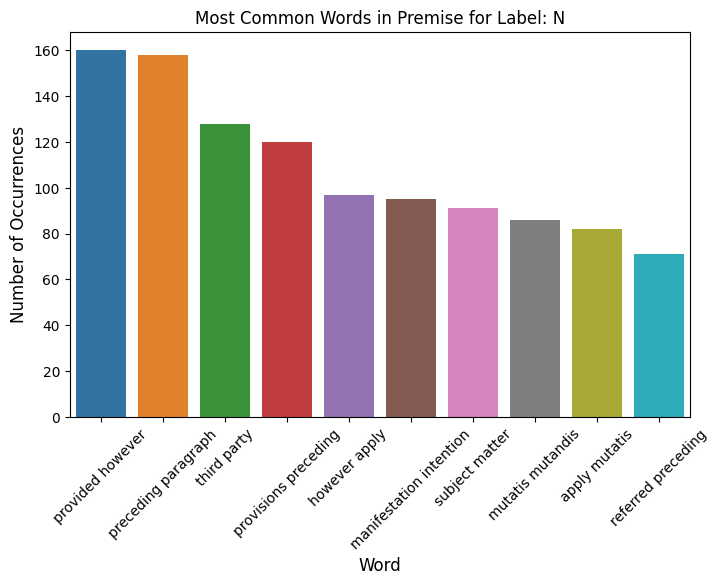

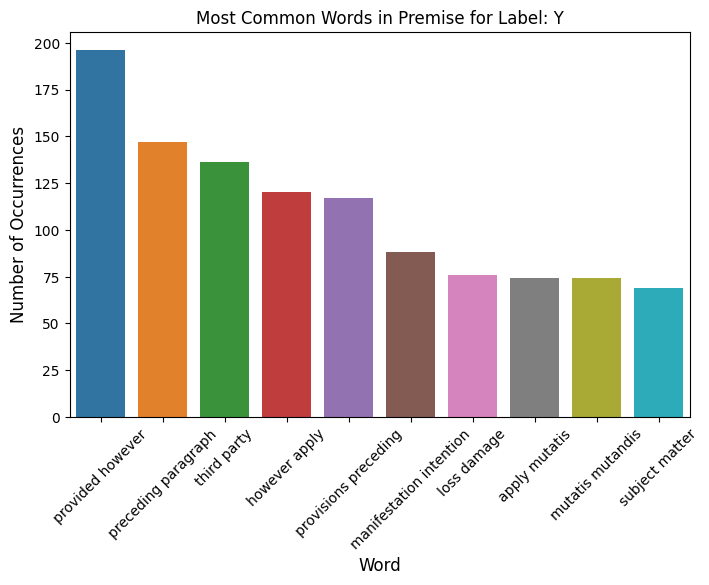

In [18]:
# combine bigrams with _ in between
most_common_bigrams_premise['most_common_bigrams_in_premise'] = most_common_bigrams_premise['most_common_bigrams_in_premise'].apply(lambda x: [(' '.join(gram), count) for gram, count in x])

# plot most common words for each label in the premise
for label in most_common_bigrams_premise['label'].unique():
    word_counts_list = most_common_bigrams_premise[most_common_bigrams_premise['label'] == label]['most_common_bigrams_in_premise'].to_list()[0]
    words = [word for word, count in word_counts_list]
    counts = [count for word, count in word_counts_list]
    plt.figure(figsize=(8, 5))
    sns.barplot(x=words, y=counts)
    plt.title(f'Most Common Words in Premise for Label: {label}')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Word', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

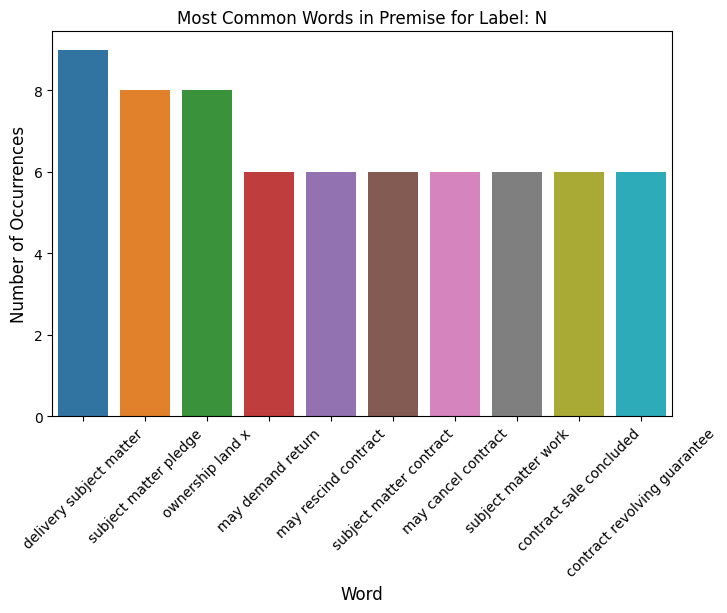

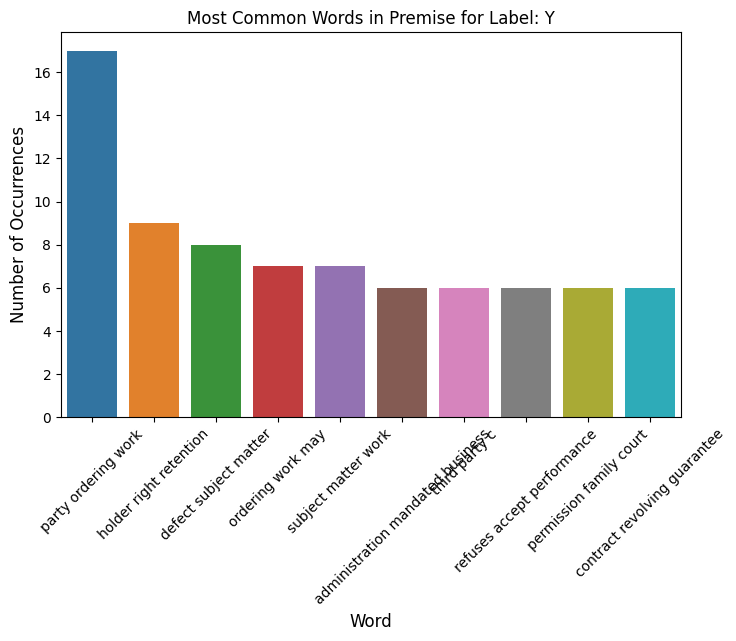

In [19]:
# combine bigrams with _ in between
most_common_trigrams_hypothesis['most_common_trigrams_in_hypothesis'] = most_common_trigrams_hypothesis['most_common_trigrams_in_hypothesis'].apply(lambda x: [(' '.join(gram), count) for gram, count in x])

# plot most common words for each label in the premise
for label in most_common_trigrams_hypothesis['label'].unique():
    word_counts_list = most_common_trigrams_hypothesis[most_common_trigrams_hypothesis['label'] == label]['most_common_trigrams_in_hypothesis'].to_list()[0]
    words = [word for word, count in word_counts_list]
    counts = [count for word, count in word_counts_list]
    plt.figure(figsize=(8, 5))
    sns.barplot(x=words, y=counts)
    plt.title(f'Most Common Words in Premise for Label: {label}')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Word', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

## Analysis 7: Sentiment distribution of the premises and hypotheses

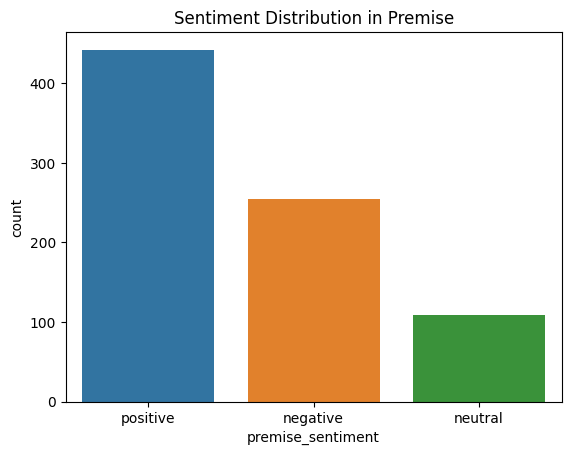

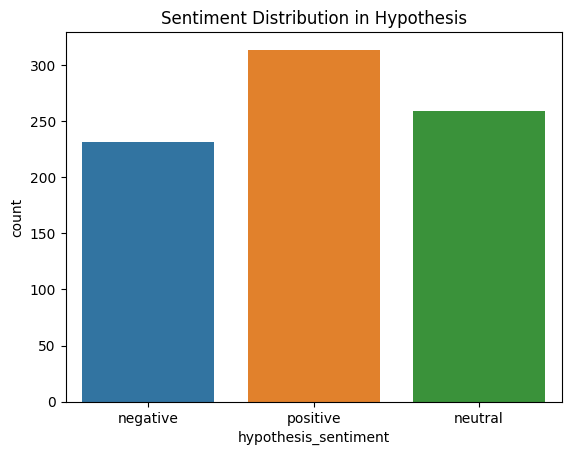

In [20]:
def get_sentiment(text):
    # Get polarity from TextBlob
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Get sentiment for each premise and hypothesis
data['premise_sentiment'] = data['premise'].apply(get_sentiment)
data['hypothesis_sentiment'] = data['hypothesis'].apply(get_sentiment)

# Plot sentiment distribution for premise
sns.countplot(data=data, x='premise_sentiment')
plt.title('Sentiment Distribution in Premise')
plt.show()

# Plot sentiment distribution for hypothesis
sns.countplot(data=data, x='hypothesis_sentiment')
plt.title('Sentiment Distribution in Hypothesis')
plt.show()


## Analysis 8: Correlation between the sentiment of the premise (or hypothesis) and the label

/Users/venkateshmurugadas/.pyenv/versions/3.10.0/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


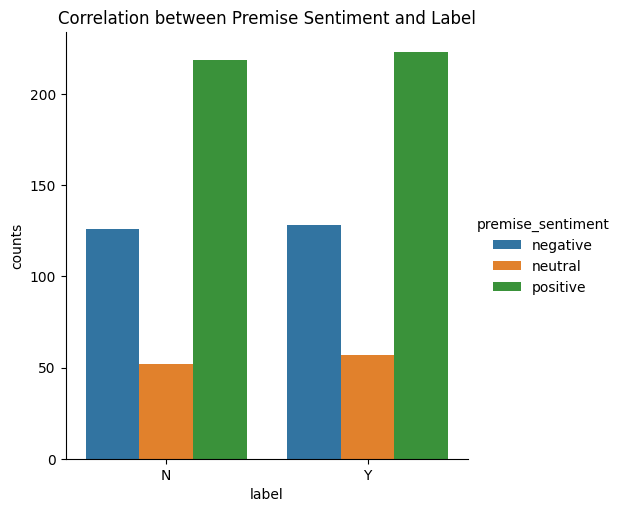

/Users/venkateshmurugadas/.pyenv/versions/3.10.0/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


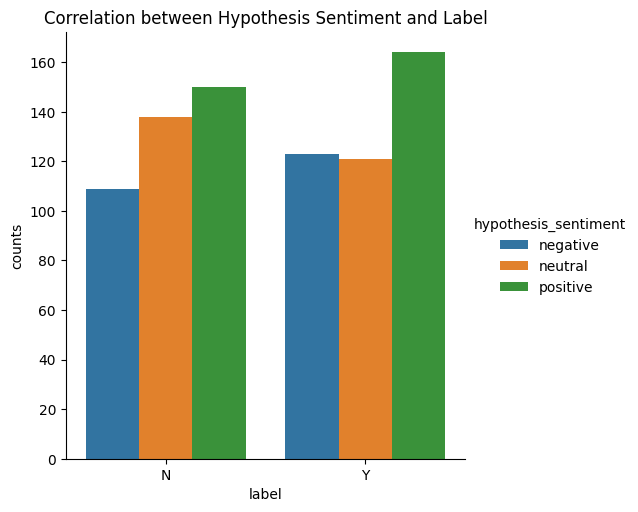

In [21]:
# Group by sentiment and label, and count the number of premises for each combination
premise_sentiment_label_counts = data.groupby(['premise_sentiment', 'label']).size().reset_index(name='counts')

# Plot counts
sns.catplot(data=premise_sentiment_label_counts, x='label', y='counts', hue='premise_sentiment', kind='bar')
plt.title('Correlation between Premise Sentiment and Label')
plt.show()

# Repeat the same for hypothesis
hypothesis_sentiment_label_counts = data.groupby(['hypothesis_sentiment', 'label']).size().reset_index(name='counts')

# Plot counts
sns.catplot(data=hypothesis_sentiment_label_counts, x='label', y='counts', hue='hypothesis_sentiment', kind='bar')
plt.title('Correlation between Hypothesis Sentiment and Label')
plt.show()


## Analysis 9: Number of unique words in the premises and hypotheses

In [22]:
# Get the number of unique words in each premise and hypothesis
data['premise_words'] = data['premise'].apply(lambda x: tokenize(x))
data['hypothesis_words'] = data['hypothesis'].apply(lambda x: tokenize(x))

premise_words = data['premise_words'].to_list()
hypothesis_words = data['hypothesis_words'].to_list()

# flatten list of lists
premise_words = [word for sentence in premise_words for word in sentence]
hypothesis_words = [word for sentence in hypothesis_words for word in sentence]
words = premise_words + hypothesis_words

# Get the number of unique words in each premise and hypothesis
premise_word_counter = Counter(premise_words)
hypothesis_word_counter = Counter(hypothesis_words)
word_counter = Counter(words)

print("Number of unique words in the dataset", len(word_counter.keys()))
print("Number of unique words in premise:", len(premise_word_counter.keys()))
print("Number of unique words in hypothesis:", len(hypothesis_word_counter.keys()))


Number of unique words in the dataset 2299
Number of unique words in premise: 1589
Number of unique words in hypothesis: 1782


## Analysis 10: Words that only appear in one type of label but not the others

In [23]:
# This operation can be resource-intensive for large datasets. Consider sampling or limiting the number of unique words if necessary.

# Get all words for each label
words_by_label = data.groupby('label')['premise'].apply(lambda texts: set(word for text in texts for word in tokenize(text)))

# Find words that only appear in one label
unique_words = {}
for label in words_by_label.index:
    other_labels = set(words_by_label.index) - {label}
    other_words = set().union(*(words_by_label[other] for other in other_labels))
    unique_words[label] = words_by_label[label] - other_words

for label, words in unique_words.items():
    print(f"Unique words in {label}: {', '.join(list(words)[:])}...")


Unique words in N: increasing, induce, alleges, ratio, detrimental, law, substituted, divisible, accepts, invokes, father, jointly, diminution, manifesting, per, enforcing, delegated, essential, detached, impossibility, estimated, partitioned, roof, contains, relates, periodically, successive, raised, onto, mother, instruments, executes, postpone, donee, dates, construed, children, root, latent, cancels, conflict, applied, release, meet, crosses, believe, portions, continuous, attaching, banks, limiting, missing, prove, conclude, meeting, total, causing, lower, later, maintain, sexes, manner, higher, honor, enjoys, tree, performances, follow, average, protected, unknown, earnest, unspecified, rainwater, mortgagees, checks, custody, executed, grants, equality, promise, consisting, true, ordered, consume, unlawful, less, related, negligently, gained, evidencing, intellectual, constantly, disregarded, consequence, usurped, successful, preserving, entrustments, continuously, annum, reflect

## Analysis 11: Lexical diversity in the premises and hypotheses

In [24]:
# Get lexical diversity for each premise and hypothesis
data['premise_lexical_diversity'] = data['premise_words'].apply(lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)
data['hypothesis_lexical_diversity'] = data['hypothesis_words'].apply(lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)

print('Average lexical diversity in premise:', data['premise_lexical_diversity'].mean())
print('Average lexical diversity in hypothesis:', data['hypothesis_lexical_diversity'].mean())


Average lexical diversity in premise: 0.7202145593851798
Average lexical diversity in hypothesis: 0.8442460013529585


## Analysis 12: Distribution of part of speech tags in the premises and hypotheses for each label

/Users/venkateshmurugadas/.pyenv/versions/3.10.0/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


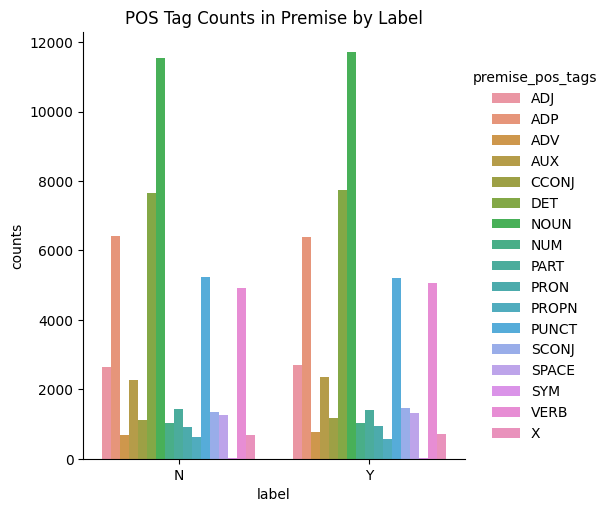

/Users/venkateshmurugadas/.pyenv/versions/3.10.0/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


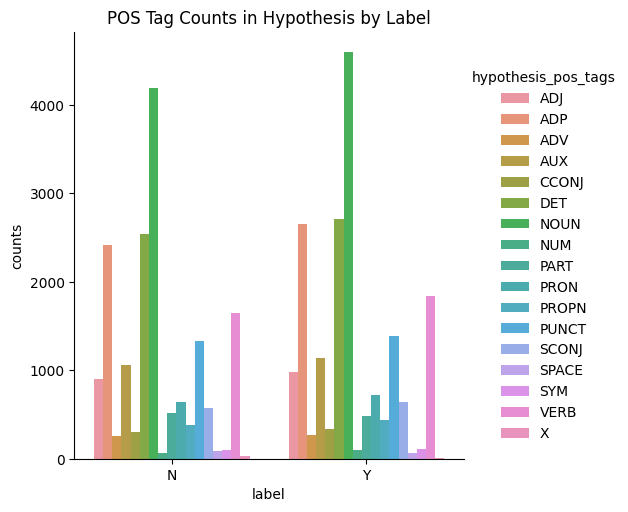

In [25]:
# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

# Function to get POS tags
def get_pos_tags(text):
    doc = nlp(text)
    return [token.pos_ for token in doc]

# Get POS tags for each premise and hypothesis
data['premise_pos_tags'] = data['premise'].apply(get_pos_tags)
data['hypothesis_pos_tags'] = data['hypothesis'].apply(get_pos_tags)

# Get POS tag counts for each label
pos_tag_counts_premise = data.explode('premise_pos_tags').groupby(['label', 'premise_pos_tags']).size().reset_index(name='counts')
pos_tag_counts_hypothesis = data.explode('hypothesis_pos_tags').groupby(['label', 'hypothesis_pos_tags']).size().reset_index(name='counts')

# Plot counts
sns.catplot(data=pos_tag_counts_premise, x='label', y='counts', hue='premise_pos_tags', kind='bar')
plt.title('POS Tag Counts in Premise by Label')
plt.show()

sns.catplot(data=pos_tag_counts_hypothesis, x='label', y='counts', hue='hypothesis_pos_tags', kind='bar')
plt.title('POS Tag Counts in Hypothesis by Label')
plt.show()


## Analysis 13: Words that are particularly indicative of a certain label (based on TF-IDF scores)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine premise and hypothesis
data['text'] = data['premise'] + ' ' + data['hypothesis']
# tokenize the text and join them back together
data['text'] = data['text'].apply(lambda x: ' '.join(tokenize(x)))

# Calculate TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Get top TF-IDF features for each label
top_tfidf_features = {}
for label in data['label'].unique():
    # Get rows for this label
    rows = data[data['label'] == label].index
    # Sum TF-IDF scores for these rows
    sum_tfidf = X[rows].sum(axis=0)
    sum_tfidf = np.asarray(sum_tfidf).reshape(-1)
    # Get top features
    top_features_indices = sum_tfidf.argsort()[-20:][::-1]
    top_features = [(feature_names[i], sum_tfidf[i]) for i in top_features_indices]
    top_tfidf_features[label] = top_features

top_tfidf_features


{'Y': [('person', 22.555548723561497),
  ('obligation', 18.792523466169808),
  ('may', 18.476102565137683),
  ('party', 17.48494823332181),
  ('article', 15.423855530509197),
  ('obligor', 15.37415398248509),
  ('principal', 14.167260289931093),
  ('thing', 13.83080369538268),
  ('claim', 13.640032497327713),
  ('contract', 13.22787339169978),
  ('act', 13.177850469575803),
  ('performance', 12.956954232370284),
  ('obligee', 12.115806869583995),
  ('right', 12.011221995573168),
  ('subject', 10.125045761759493),
  ('land', 9.630323962794817),
  ('apply', 9.624376340124808),
  ('third', 9.588499189010637),
  ('intention', 9.497107903721156),
  ('provided', 9.241063782520918)],
 'N': [('person', 23.19669681642212),
  ('may', 17.411819323638248),
  ('party', 17.19864317600263),
  ('obligor', 15.859728523269617),
  ('obligation', 15.328192121843301),
  ('article', 14.883460264909054),
  ('act', 14.549643509148979),
  ('thing', 14.542864081464357),
  ('claim', 14.33212296547844),
  ('oblig

## Analysis 14: Readability score (like Flesch-Kincaid) of the premises and hypotheses

https://pypi.org/project/textstat/

In [29]:
import textstat

# Calculate readability score for each premise and hypothesis
data['premise_readability'] = data['premise'].apply(textstat.flesch_reading_ease)
data['hypothesis_readability'] = data['hypothesis'].apply(textstat.flesch_reading_ease)

print('Average readability score in premise:', data['premise_readability'].mean())
print('Average readability score in hypothesis:', data['hypothesis_readability'].mean())

Average readability score in premise: 28.596944099378884
Average readability score in hypothesis: 39.261838509316775


## Analysis 15: Premises and hypotheses containing named entities (persons, organizations, locations)

/Users/venkateshmurugadas/.pyenv/versions/3.10.0/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


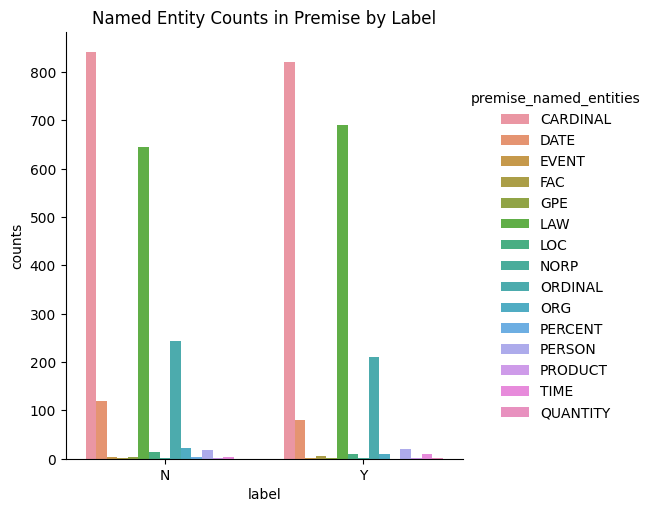

/Users/venkateshmurugadas/.pyenv/versions/3.10.0/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


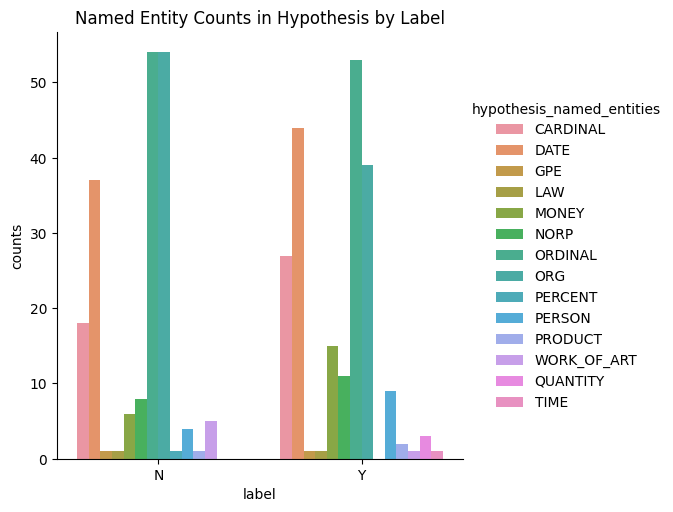

In [30]:
# Function to get named entities
def get_named_entities(text):
    doc = nlp(text)
    return [ent.label_ for ent in doc.ents]

# Get named entities for each premise and hypothesis
data['premise_named_entities'] = data['premise'].apply(get_named_entities)
data['hypothesis_named_entities'] = data['hypothesis'].apply(get_named_entities)

# Get named entity counts for each label
named_entity_counts_premise = data.explode('premise_named_entities').groupby(['label', 'premise_named_entities']).size().reset_index(name='counts')
named_entity_counts_hypothesis = data.explode('hypothesis_named_entities').groupby(['label', 'hypothesis_named_entities']).size().reset_index(name='counts')

# Plot counts
sns.catplot(data=named_entity_counts_premise, x='label', y='counts', hue='premise_named_entities', kind='bar')
plt.title('Named Entity Counts in Premise by Label')
plt.show()

sns.catplot(data=named_entity_counts_hypothesis, x='label', y='counts', hue='hypothesis_named_entities', kind='bar')
plt.title('Named Entity Counts in Hypothesis by Label')
plt.show()


## Analysis 16: Correlation between the presence of named entities in the premise (or hypothesis) and the label

/Users/venkateshmurugadas/.pyenv/versions/3.10.0/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


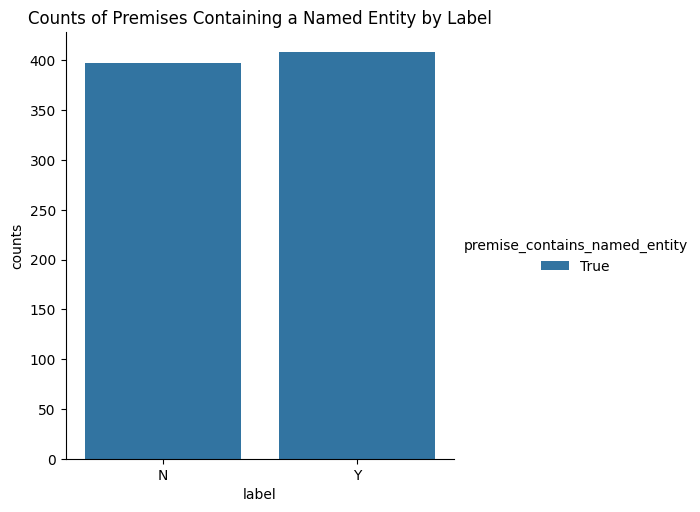

/Users/venkateshmurugadas/.pyenv/versions/3.10.0/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


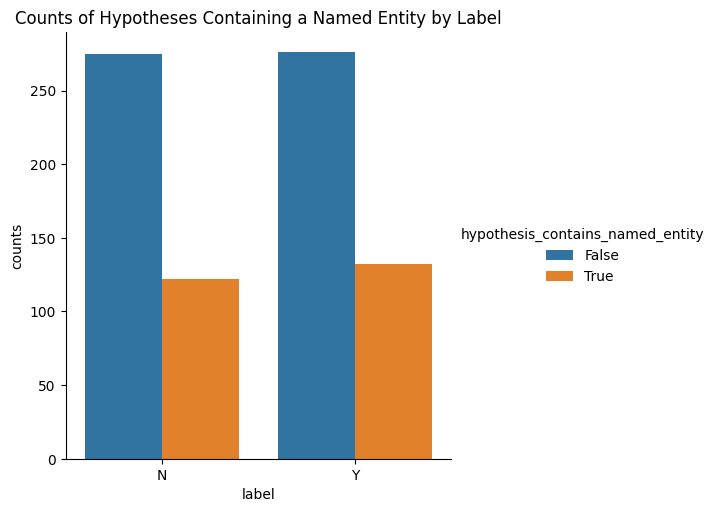

In [31]:
# Add columns for whether each premise and hypothesis contains a named entity
data['premise_contains_named_entity'] = data['premise_named_entities'].apply(lambda x: len(x) > 0)
data['hypothesis_contains_named_entity'] = data['hypothesis_named_entities'].apply(lambda x: len(x) > 0)

# Group by whether premise contains a named entity and label, and count the number of premises for each combination
premise_ne_label_counts = data.groupby(['premise_contains_named_entity', 'label']).size().reset_index(name='counts')

# Plot counts
sns.catplot(data=premise_ne_label_counts, x='label', y='counts', hue='premise_contains_named_entity', kind='bar')
plt.title('Counts of Premises Containing a Named Entity by Label')
plt.show()

# Repeat the same for hypothesis
hypothesis_ne_label_counts = data.groupby(['hypothesis_contains_named_entity', 'label']).size().reset_index(name='counts')

# Plot counts
sns.catplot(data=hypothesis_ne_label_counts, x='label', y='counts', hue='hypothesis_contains_named_entity', kind='bar')
plt.title('Counts of Hypotheses Containing a Named Entity by Label')
plt.show()


## Analysis 17: Distribution of syntactic parse trees or dependency structures in the premises and hypotheses for each label

/Users/venkateshmurugadas/.pyenv/versions/3.10.0/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


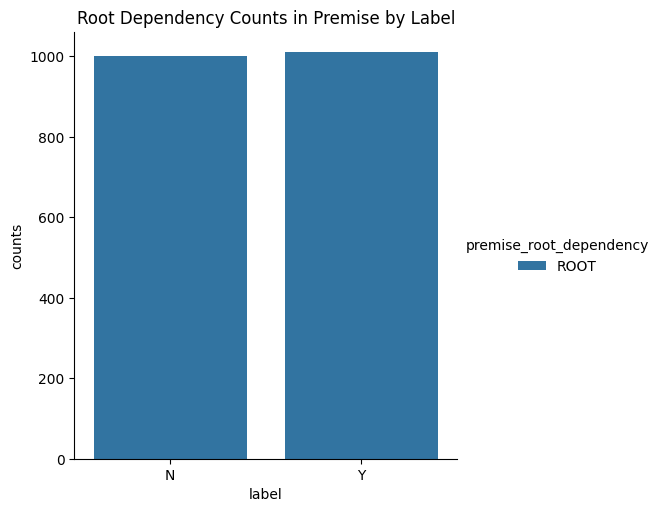

/Users/venkateshmurugadas/.pyenv/versions/3.10.0/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


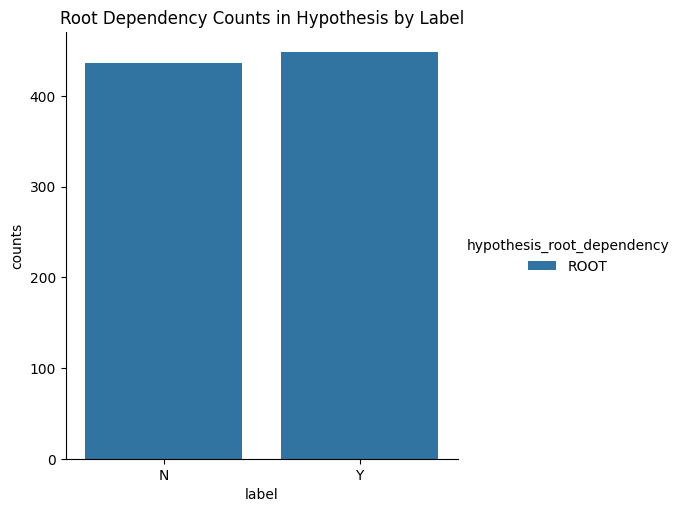

In [32]:
# Function to get root dependency
def get_root_dependency(text):
    doc = nlp(text)
    return [token.dep_ for token in doc if token.head == token]

# Get root dependency for each premise and hypothesis
data['premise_root_dependency'] = data['premise'].apply(get_root_dependency)
data['hypothesis_root_dependency'] = data['hypothesis'].apply(get_root_dependency)

# Get root dependency counts for each label
root_dependency_counts_premise = data.explode('premise_root_dependency').groupby(['label', 'premise_root_dependency']).size().reset_index(name='counts')
root_dependency_counts_hypothesis = data.explode('hypothesis_root_dependency').groupby(['label', 'hypothesis_root_dependency']).size().reset_index(name='counts')

# Plot counts
sns.catplot(data=root_dependency_counts_premise, x='label', y='counts', hue='premise_root_dependency', kind='bar')
plt.title('Root Dependency Counts in Premise by Label')
plt.show()

sns.catplot(data=root_dependency_counts_hypothesis, x='label', y='counts', hue='hypothesis_root_dependency', kind='bar')
plt.title('Root Dependency Counts in Hypothesis by Label')
plt.show()

## Analysis 18: Premises and hypotheses containing negations

In [34]:
# Function to check if text contains a negation
def contains_negation(text):
    doc = nlp(text)
    return any(token.dep_ == 'neg' for token in doc)

# Check if each premise and hypothesis contains a negation
data['premise_contains_negation'] = data['premise'].apply(contains_negation)
data['hypothesis_contains_negation'] = data['hypothesis'].apply(contains_negation)

print('Number of premises containing a negation:', data['premise_contains_negation'].sum())
print('Number of hypotheses containing a negation:', data['hypothesis_contains_negation'].sum())

# print the label distribution for premises containing a negation
print('Label distribution for premises containing a negation:')
print(data[data['premise_contains_negation'] == True]['label'].value_counts())

# print the label distribution for hypotheses containing a negation
print('Label distribution for hypotheses containing a negation:')
print(data[data['hypothesis_contains_negation'] == True]['label'].value_counts())



Number of premises containing a negation: 501
Number of hypotheses containing a negation: 386
Label distribution for premises containing a negation:
label
Y    256
N    245
Name: count, dtype: int64
Label distribution for hypotheses containing a negation:
label
N    208
Y    178
Name: count, dtype: int64


## Analysis 19: Correlation between the presence of negations in the premise (or hypothesis) and the label

/Users/venkateshmurugadas/.pyenv/versions/3.10.0/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


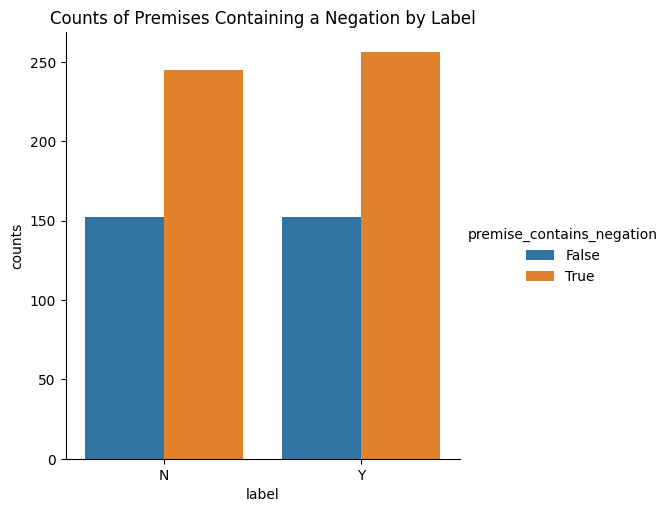

/Users/venkateshmurugadas/.pyenv/versions/3.10.0/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


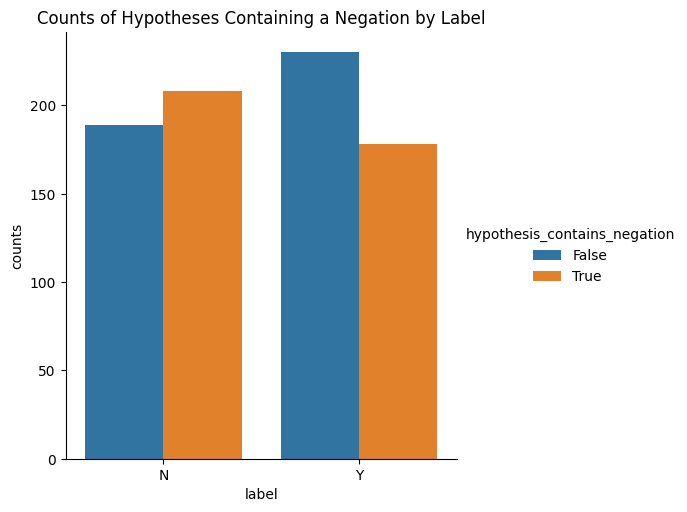

In [35]:
# Group by whether premise contains a negation and label, and count the number of premises for each combination
premise_neg_label_counts = data.groupby(['premise_contains_negation', 'label']).size().reset_index(name='counts')

# Plot counts
sns.catplot(data=premise_neg_label_counts, x='label', y='counts', hue='premise_contains_negation', kind='bar')
plt.title('Counts of Premises Containing a Negation by Label')
plt.show()

# Repeat the same for hypothesis
hypothesis_neg_label_counts = data.groupby(['hypothesis_contains_negation', 'label']).size().reset_index(name='counts')

# Plot counts
sns.catplot(data=hypothesis_neg_label_counts, x='label', y='counts', hue='hypothesis_contains_negation', kind='bar')
plt.title('Counts of Hypotheses Containing a Negation by Label')
plt.show()


95% percentile of combined lengths:  360.7999999999997


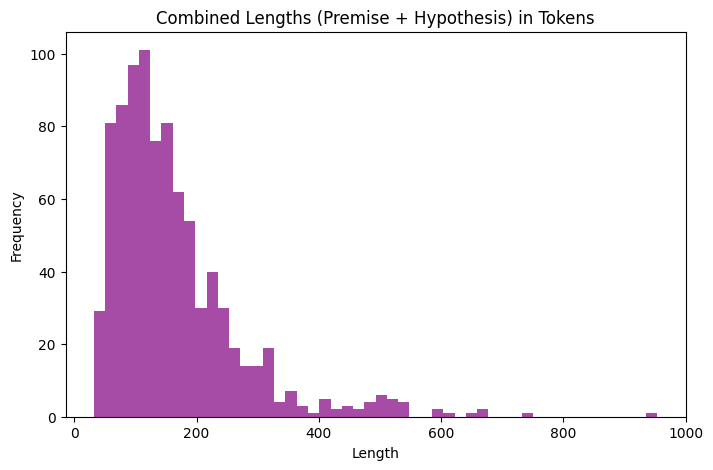

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Users/venkateshmurugadas/software_codes/nli_artefacts_detection/data/coliee_data/processed/task 4/train/coliee_train_2022.csv')

# Compute the combined lengths of premise and hypothesis
data['combined_length'] = data['prem_length'] + data['hyp_length']

print("95% percentile of combined lengths: ", data['combined_length'].quantile(0.95))

# Plot the frequency of combined lengths
plt.figure(figsize=(8, 5))
plt.hist(data['combined_length'], bins=50, color='purple', alpha=0.7)
plt.title('Combined Lengths (Premise + Hypothesis) in Tokens')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [4]:
# data above 512 length
above_512 = data[data['combined_length'] > 512]['combined_length']
len(above_512)

17